In [ ]:
!pip install yfinance
!pip install pykalman

In [ ]:
import yfinance as yf
data = yf.download("BTC-USD", start="2017-01-01", end="2021-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008


In [ ]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constructing Kalman filter 1 (the more sensitive one)

kf1 = KalmanFilter(transition_matrices = [1],
                 observation_matrices = [1],
                 initial_state_mean = 0,
                 initial_state_covariance = 1,
                 observation_covariance=1,
                 transition_covariance=0.0001)

state_means1, _ = kf1.filter(data['Close'].values)
data['KF_mean1'] = np.array(state_means1)
data.head()

Price,Close,High,Low,Open,Volume,KF_mean1
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008,499.162506
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992,673.381562
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000,766.026259
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984,843.812084
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008,872.098832


In [ ]:
data.describe()

Price,Close,High,Low,Open,Volume,KF_mean1
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,15486.095565,15889.620237,14997.166789,15463.369252,2.106902e+10,12830.473795
std,16979.323407,17439.318437,16433.868871,16971.863991,2.118325e+10,13446.006929
min,777.757019,823.307007,755.755981,775.177979,6.085170e+07,499.162506
25%,5554.330078,5653.609863,5358.379883,5524.600098,4.569370e+09,5305.574912
50%,8659.487305,8826.943359,8389.889648,8658.991211,1.652272e+10,8303.046350
75%,13950.300781,14511.799805,13243.160156,13950.488281,3.264635e+10,9880.956830
max,67566.828125,68789.625000,66382.062500,67549.734375,3.509679e+11,50102.319579


In [ ]:
state_means1.shape

(1825, 1)

In [ ]:
# Constructing Kalman filter 2 (the more smoothened/less sensitive one)

kf2 = KalmanFilter(transition_matrices = [1],
                 observation_matrices = [1],
                 initial_state_mean = 0,
                 initial_state_covariance = 1,
                 observation_covariance=1,
                 transition_covariance=0.003)

state_means2, _ = kf2.filter(data['Close'].values)
data['KF_mean2'] = np.array(state_means2)
data.head()

Price,Close,High,Low,Open,Volume,KF_mean1,KF_mean2
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008,499.162506,499.162506
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992,673.381562,674.053730
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000,766.026259,767.398173
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984,843.812084,846.204305
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008,872.098832,874.812757


Text(0, 0.5, 'Price')

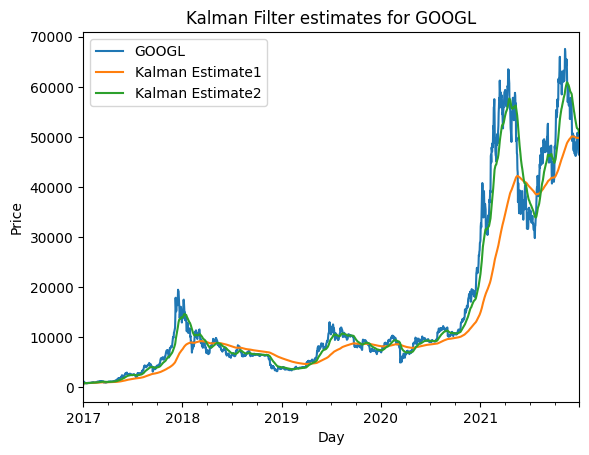

In [ ]:
data[['Close','KF_mean1','KF_mean2']].plot()
plt.title('Kalman Filter estimates for GOOGL')
plt.legend(['GOOGL','Kalman Estimate1','Kalman Estimate2'])
plt.xlabel('Day')
plt.ylabel('Price')

Text(0.5, 0, 'Days')

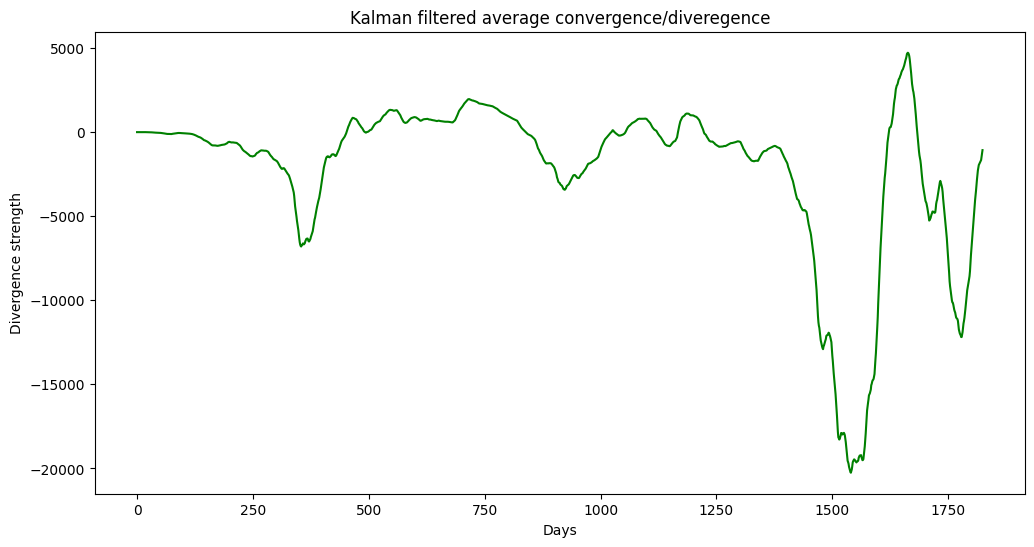

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(state_means1 - state_means2, 'green')
plt.title("Kalman filtered average convergence/diveregence")
plt.ylabel("Divergence strength")
plt.xlabel("Days")

In [ ]:
div = state_means1 - state_means2
data['divergence'] = np.array(div)
data.head()

Price,Close,High,Low,Open,Volume,KF_mean1,KF_mean2,divergence
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008,499.162506,499.162506,0.000000
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992,673.381562,674.053730,-0.672168
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000,766.026259,767.398173,-1.371914
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984,843.812084,846.204305,-2.392221
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008,872.098832,874.812757,-2.713925


In [ ]:
kf3 = KalmanFilter(transition_matrices = [1],
                 observation_matrices = [1],
                 initial_state_mean = 0,
                 initial_state_covariance = 1,
                 observation_covariance=1,
                 transition_covariance=0.0001)

sig, _ = kf3.filter(data['divergence'].values)
data['signal'] = np.array(sig)
data.head()

Price,Close,High,Low,Open,Volume,KF_mean1,KF_mean2,divergence,signal
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
Date,,,,,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008,499.162506,499.162506,0.000000,0.000000
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992,673.381562,674.053730,-0.672168,-0.224086
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000,766.026259,767.398173,-1.371914,-0.511136
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984,843.812084,846.204305,-2.392221,-0.887571
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008,872.098832,874.812757,-2.713925,-1.192238


Text(0, 0.5, 'Price')

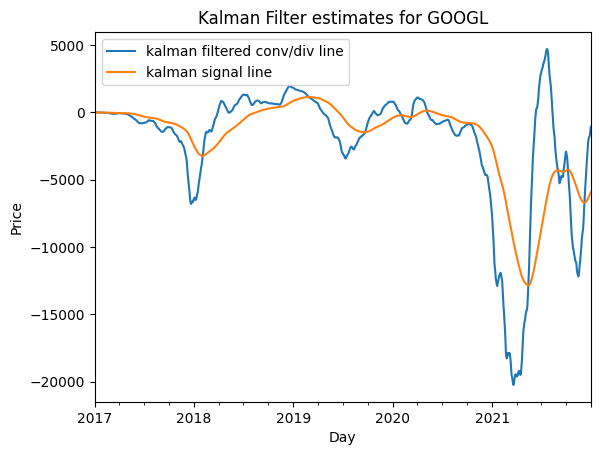

In [ ]:
data[['divergence','signal']].plot()
plt.title('Kalman Filter estimates for GOOGL')
plt.legend(['kalman filtered conv/div line', 'kalman signal line'])
plt.xlabel('Day')
plt.ylabel('Price')

Text(0.5, 0, 'Days')

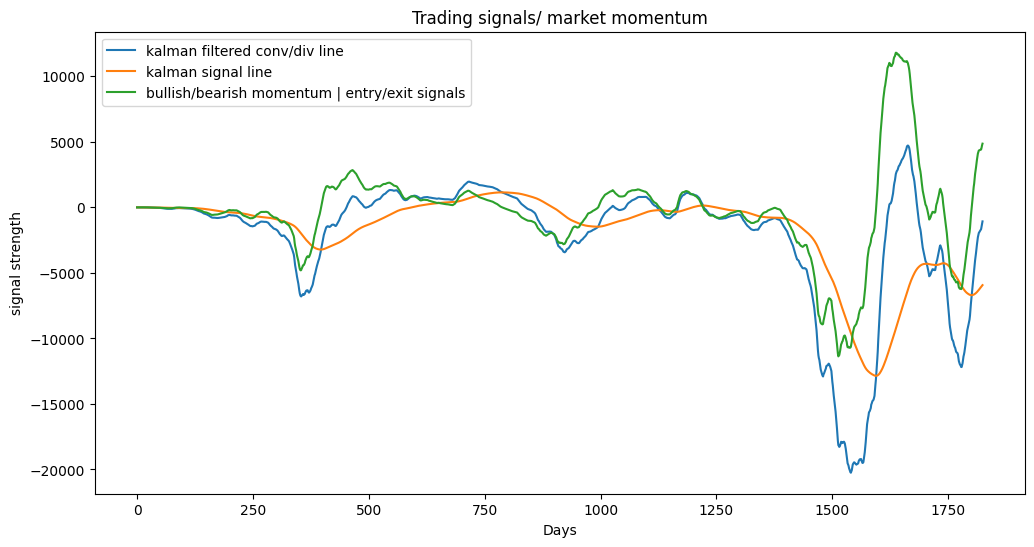

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(div)
plt.plot(sig)
plt.plot(div - sig)
plt.legend(['kalman filtered conv/div line', 'kalman signal line', 'bullish/bearish momentum | entry/exit signals'])
plt.title("Trading signals/ market momentum")
plt.ylabel("signal strength")
plt.xlabel("Days")